In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [2]:
# load package for loading data
import pandas as pd

In [3]:
housing_dataset = pd.read_csv(r"C:\Users\cungu\Downloads\CS115_LAB01\boston_housing.csv")
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [4]:
X = housing_dataset["RM"]
y = housing_dataset["MEDV"]
X = np.array(X).reshape(-1, 1) 


In [5]:
# load package for spliting data
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)


### Data Visualization

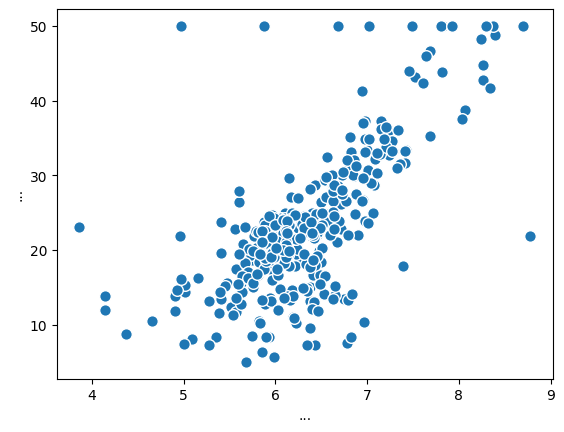

In [7]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.xlabel('...')
plt.ylabel('...')
plt.show()

### Linear Regression (Base)

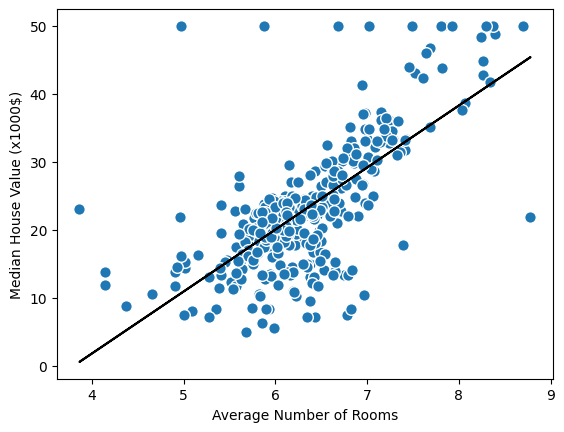

In [8]:

from sklearn.linear_model import LinearRegression

regr = LinearRegression()

# X_train_reshape = X_train.values.reshape(-1, 1)
# X_test_reshape = X_test.values.reshape(-1, 1)

regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, y_pred, color = "black")
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Gradient Descent

In [9]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.bias = 0
        self.costs = [] 

    def _compute_cost(self, X, y):
        
        m = len(y)
        predictions = self.predict(X)
        cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
        return cost
    
    def _compute_weight(self):
        return self.w

    def fit(self, X, y):
        
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        m = len(y)  

        
        for i in range(self.iterations):
            predictions = self.predict(X)

            
            dw = (1/m) * np.dot(X.T, (predictions - y))
            db = (1/m) * np.sum(predictions - y)

            
            self.w -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            
            cost = self._compute_cost(X, y)
            self.costs.append(cost)

            
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost}")

    def predict(self, X):
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.values
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return np.dot(X, self.w) + self.bias
    
    

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

- Experiment with eta = 1e-2

Iteration 0: Cost = 125.6225685336765
Iteration 100: Cost = 30.207219473319782


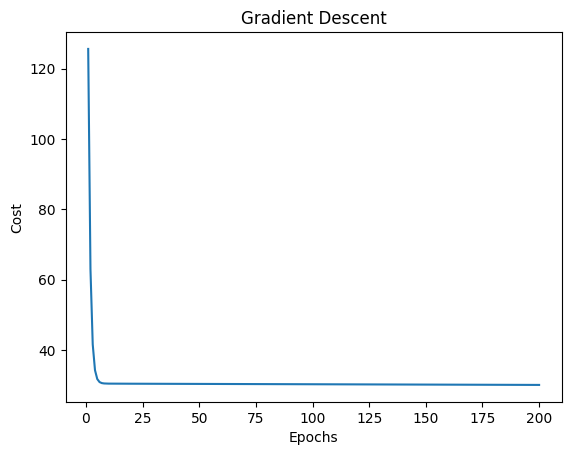

In [10]:
# Initialize the model
reg_GD = LinearRegressionGD(learning_rate = 0.01, iterations= 200)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

- Experiment with eta = 1e-3

Iteration 0: Cost = 286.1742093468144
Iteration 100: Cost = 30.436195359631828


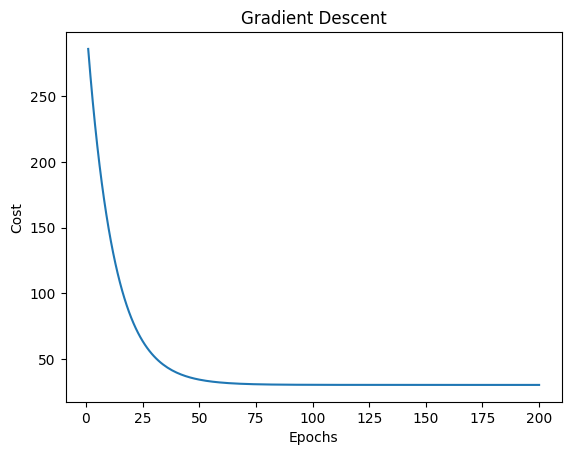

In [11]:
# Initialize the model
reg_GD = LinearRegressionGD(learning_rate = 0.001, iterations= 200)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

- Experiment with eta = 1e-4

Iteration 0: Cost = 306.5052388494464
Iteration 100: Cost = 150.54517425604553


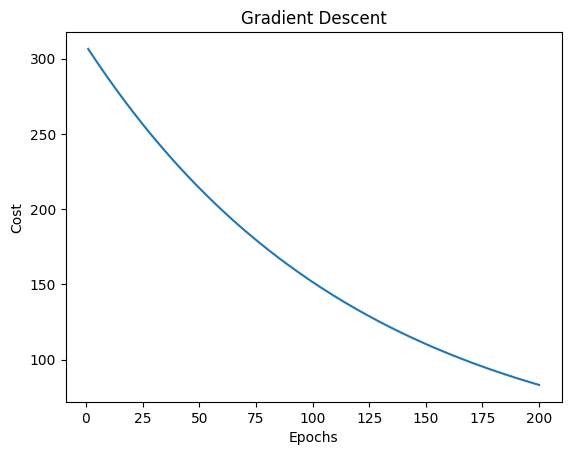

In [12]:
# Initialize the model
reg_GD = LinearRegressionGD(learning_rate = 0.0001, iterations= 200)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

--> Eta0 = 1e-4 has the best performance out of the three learning rates

Visualize the prediction of Gradient Descent model on Training Data

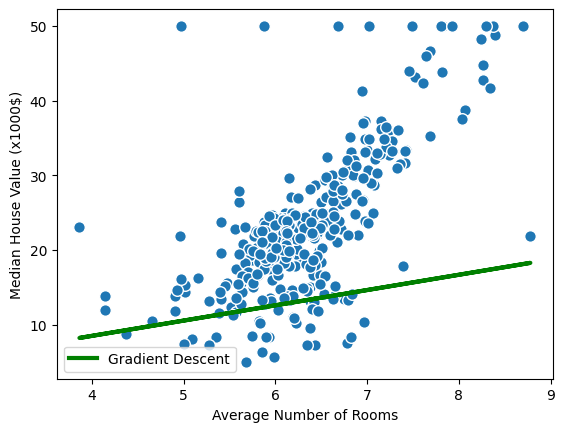

In [13]:

plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=3, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [14]:
from sklearn.linear_model import SGDRegressor

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [15]:
# Initialize the model
reg_SGD = SGDRegressor(max_iter= 200, eta0= 1e-4, random_state= 42)

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, max_iter=200, random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data

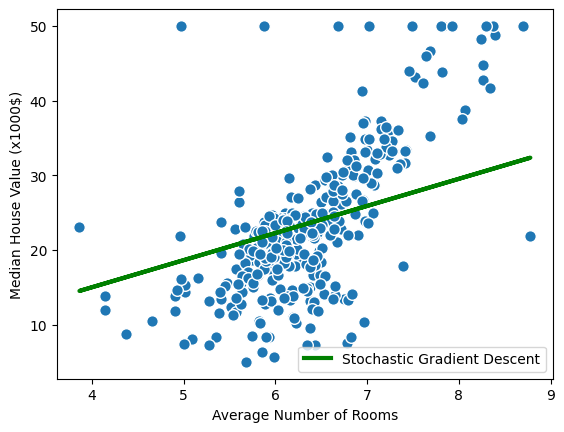

In [16]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='green', lw=3, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [17]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()
 
# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

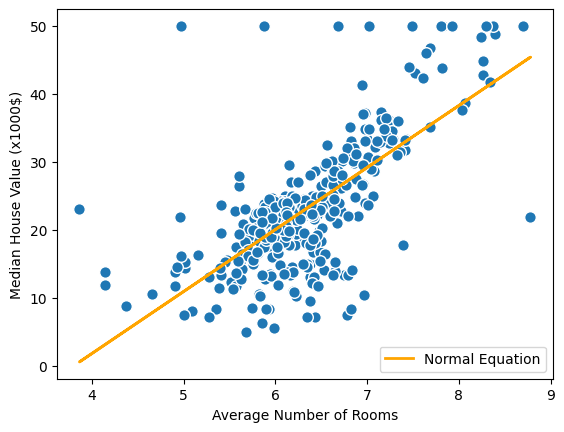

In [18]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

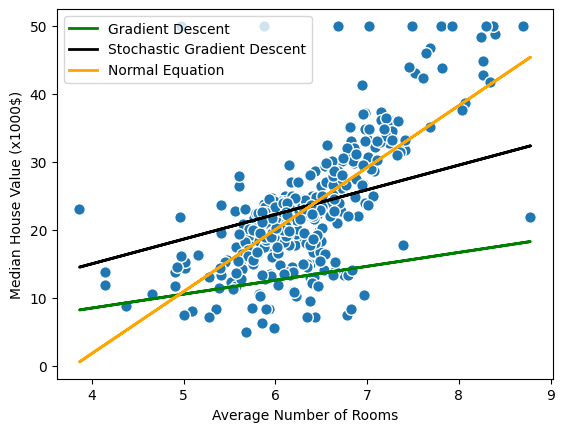

In [19]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=2, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=2, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [20]:
w_GD = reg_GD.w
w_SGD = reg_SGD.coef_
w_NE = reg_NE.coef_
print(w_GD)
print(w_SGD)
print(w_NE)

[2.04522012]
[3.62945908]
[9.1181022]


Performance Comparisons (on Testing Set)

In [21]:
y_pred_GD = reg_GD.predict(X_test)

In [22]:
y_pred_SGD = reg_SGD.predict(X_test)

In [23]:
y_pred_NE = reg_NE.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [25]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 8.924892
MAE of SGD: 5.413509
MAE of NE: 4.314224


In [26]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 131.88764
MSE of SGD: 54.750232
MSE of NE: 40.35145


In [27]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -0.769993
R2 of SGD: 0.265227
R2 of NE: 0.458465


## Experiment with Standardized Data

In [28]:
# Re-load the dataset
housing_dataset = pd.read_csv("boston_housing.csv")

In [29]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [30]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [31]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset['RM']
y = housing_dataset['MEDV']

In [32]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

Iteration 0: Cost = 308.21807527731755
Iteration 100: Cost = 254.64188562721623


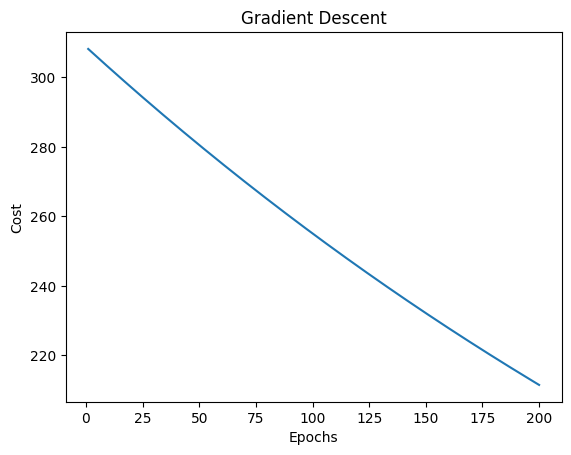

In [33]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = LinearRegressionGD(learning_rate=1e-3, iterations=200)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



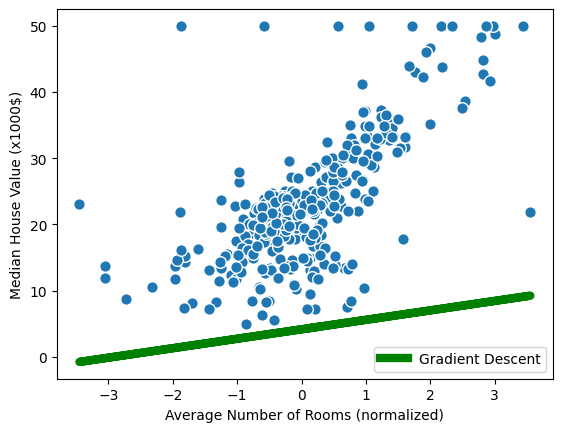

In [34]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [35]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = SGDRegressor(eta0=1e-3, max_iter=200, random_state=42, learning_rate= 'constant')

# Reshape
X_train_norm_reshape = np.array(X_train_norm).reshape(-1, 1)
# Train SGD model on standardized data
reg_SGD.fit(X_train_norm_reshape, y_train)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=200,
             random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


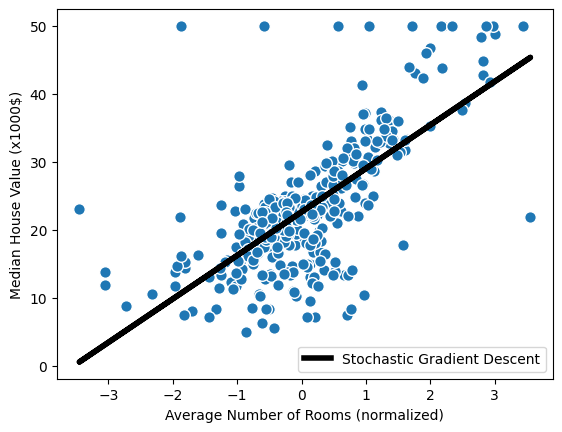

In [36]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm_reshape, reg_SGD.predict(X_train_norm_reshape), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [37]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm_reshape, y_train)

LinearRegression()

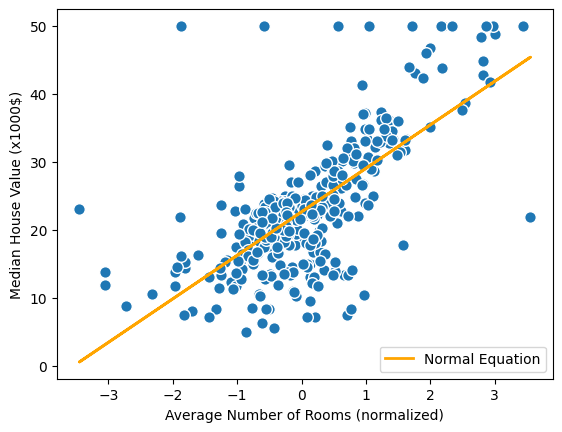

In [38]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm_reshape, reg_NE.predict(X_train_norm_reshape), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

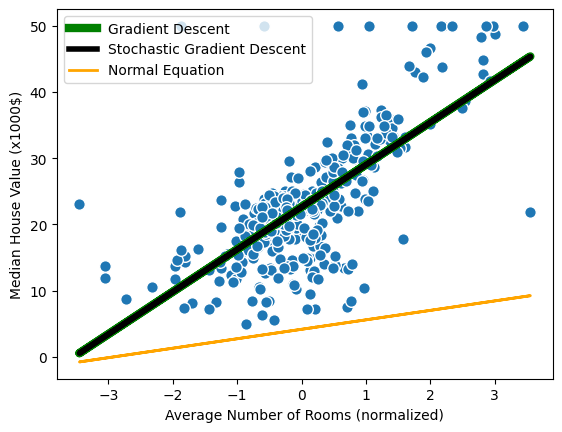

In [39]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm_reshape, reg_NE.predict(X_train_norm_reshape), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm_reshape, reg_SGD.predict(X_train_norm_reshape), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm_reshape, reg_GD.predict(X_train_norm_reshape), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [40]:
w_GD = reg_GD.w
w_GD

array([1.42872269])

In [41]:
w_SGD = reg_SGD.coef_
w_SGD

array([6.39567675])

In [42]:
w_NE = reg_NE.coef_
w_NE

array([6.40020122])

In [43]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [44]:
y_pred_SGD = reg_SGD.predict(np.array(X_test_norm).reshape(-1, 1))

In [45]:
y_pred_NE = reg_NE.predict(np.array(X_test_norm).reshape(-1, 1))

In [46]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 17.436583
MAE of SGD: 4.312817
MAE of NE: 4.314224


In [47]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 364.753517
MSE of SGD: 40.336472
MSE of NE: 40.35145


In [48]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -3.89516
R2 of SGD: 0.458666
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [49]:
# Re-load dataset
housing_dataset = pd.read_csv("boston_housing.csv")

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [50]:
X = housing_dataset.drop(columns= ['MEDV'], axis= 1)
y = housing_dataset['MEDV']


In [54]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

Iteration 0: Cost = 23342753.813149292
Iteration 100: Cost = inf


c:\Users\cungu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\cungu\AppData\Local\Temp\ipykernel_8860\894008526.py:13: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
C:\Users\cungu\AppData\Local\Temp\ipykernel_8860\894008526.py:43: RuntimeWarning: invalid value encountered in subtract
  self.w -= self.learning_rate * dw


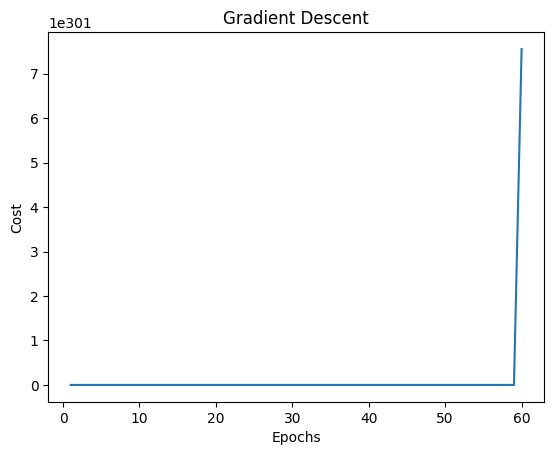

In [63]:
# Initalize the GD model
reg_GD = LinearRegressionGD(learning_rate= 1e-3, iterations= 200)

# Train model
reg_GD.fit(X_train_multi, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Iteration 0: Cost = 220168.19084184308
Iteration 100: Cost = 9.55859898248648e+301


C:\Users\cungu\AppData\Local\Temp\ipykernel_8860\894008526.py:13: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((predictions - y) ** 2)


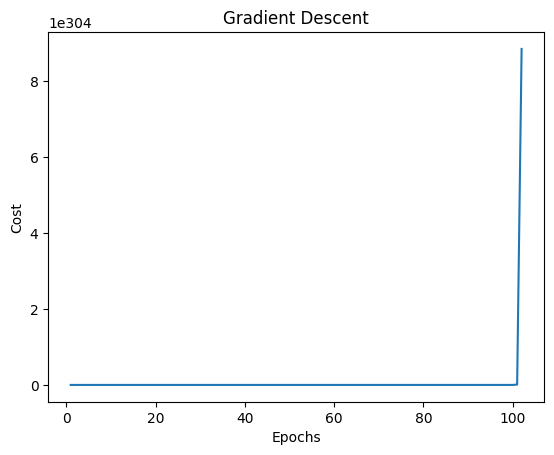

In [65]:
# Initalize the GD model
reg_GD = LinearRegressionGD(learning_rate= 1e-4, iterations= 200)

# Train model
reg_GD.fit(X_train_multi, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Iteration 0: Cost = 1150.8988778432738
Iteration 100: Cost = 1.6229155699921818e+69


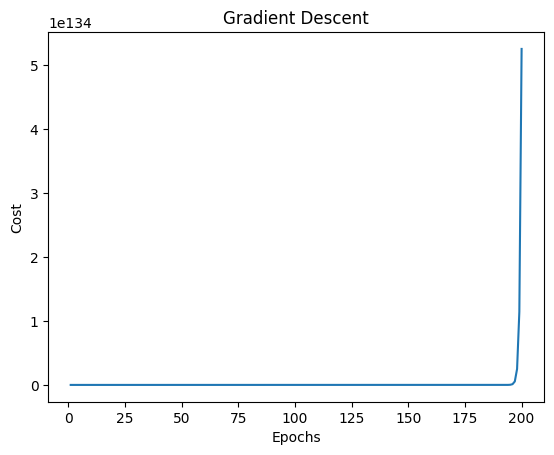

In [66]:
# Initalize the GD model
reg_GD = LinearRegressionGD(learning_rate= 1e-5, iterations= 200)

# Train model
reg_GD.fit(X_train_multi, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Iteration 0: Cost = 181.58238411074754
Iteration 100: Cost = 41.919989685304756


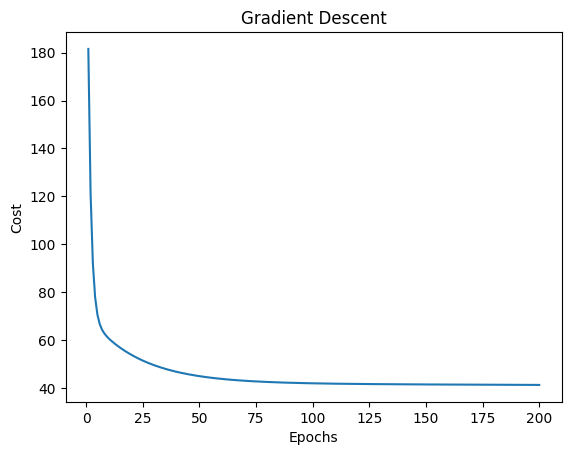

In [67]:
# Initalize the GD model
reg_GD = LinearRegressionGD(learning_rate= 1e-6, iterations= 200)

# Train model
reg_GD.fit(X_train_multi, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Iteration 0: Cost = 293.9748617641695
Iteration 100: Cost = 60.93505198305322


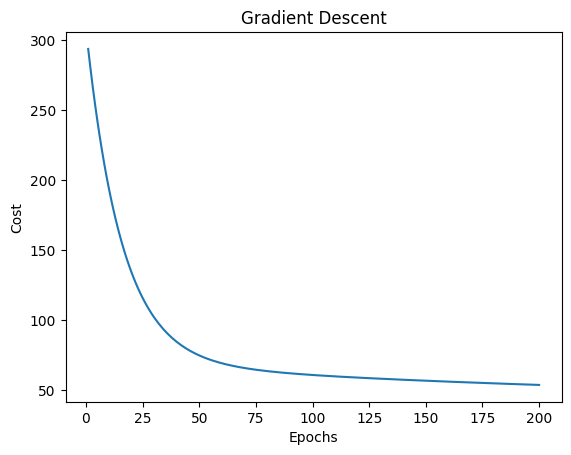

In [68]:
# Initalize the GD model
reg_GD = LinearRegressionGD(learning_rate= 1e-7, iterations= 200)

# Train model
reg_GD.fit(X_train_multi, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Iteration 0: Cost = 307.30735079977836
Iteration 100: Cost = 195.6752171156048


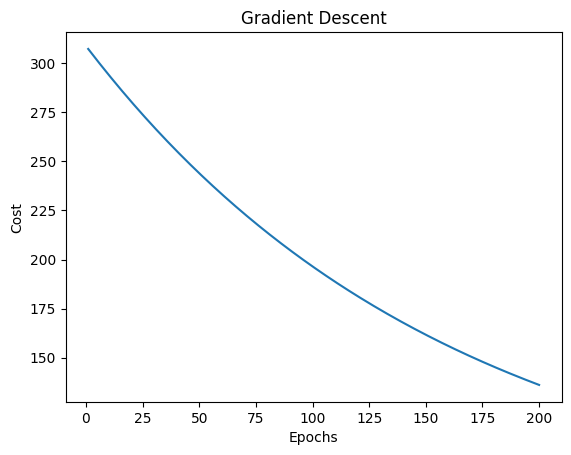

In [69]:
# Initalize the GD model
reg_GD = LinearRegressionGD(learning_rate= 1e-8, iterations= 200)

# Train model
reg_GD.fit(X_train_multi, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

--> eta0 = 1e-8 is the most suitable learning rate value


### Stochastic Gradient Descent

In [70]:
# Initialize the SGD model
reg_SGD = SGDRegressor(max_iter= 200, random_state= 42, eta0 = 1e-5)

# Train model
reg_SGD.fit(X_train_multi, y_train)

SGDRegressor(eta0=1e-05, max_iter=200, random_state=42)

### Normal Equation

In [71]:
# Add the '1' column to data
housing_dataset['1'] = 0

In [72]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_multi, y_train)

LinearRegression()

### Algorithms Comparisons

In [73]:
w_GD = reg_GD.w
w_GD

array([5.40783427e-05, 5.50963526e-04, 3.21692072e-04, 3.64976244e-06,
       1.85032963e-05, 2.31451875e-04, 2.20549063e-03, 1.43526820e-04,
       2.54340408e-04, 1.25456387e-02, 6.17677113e-04, 1.31090621e-02,
       3.29687245e-04])

In [74]:
w_SGD = reg_SGD.coef_
w_SGD

array([-0.09965762,  0.11842603, -0.04862075,  0.00700444,  0.0025354 ,
        0.0935132 ,  0.07005582,  0.01778691, -0.01040496, -0.00073332,
        0.05235021,  0.04825058, -0.28371468])

In [75]:
w_NE = reg_NE.coef_
w_NE

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [76]:
y_pred_GD = reg_GD.predict(X_test)

In [77]:
y_pred_SGD = reg_SGD.predict(X_test)

In [78]:
y_pred_NE = reg_NE.predict(X_test)

In [79]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 11.982448
MAE of SGD: 5.531251
MAE of NE: 3.16271


In [80]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 221.881075
MSE of SGD: 58.766286
MSE of NE: 21.517444


In [81]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -1.977746
R2 of SGD: 0.211329
R2 of NE: 0.711226


## Experiment with Standardized Data

In [82]:
# Re-load dataset
housing_dataset = pd.read_csv("boston_housing.csv")

In [83]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [84]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [86]:
X_new_std = housing_dataset.drop(columns= ['MEDV'], axis= 1)
y = housing_dataset['MEDV']

In [87]:
# Split train-test set (7:3, random_state = 42)
X_train_norm_multi, X_test_norm_multi, y_train, y_test = train_test_split(X_new_std, y, test_size= 0.3, random_state= 42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

Iteration 0: Cost = 307.99313703155747
Iteration 100: Cost = 241.62603438643936


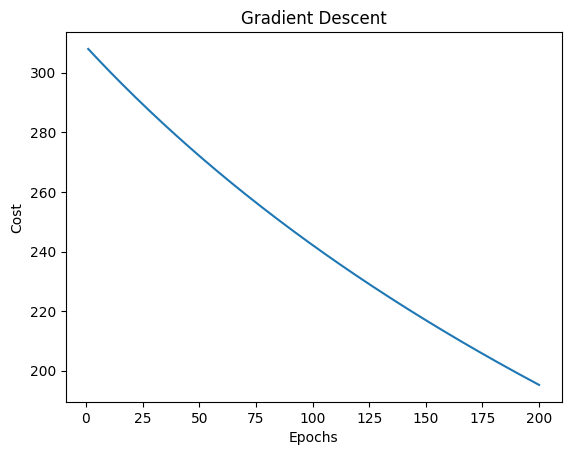

In [88]:
# Initalize the GD model
reg_GD = LinearRegressionGD(learning_rate=1e-3, iterations=200)

# Train model on normalized data
reg_GD.fit(X_train_norm_multi, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Iteration 0: Cost = 308.7302325824805
Iteration 100: Cost = 300.7257053952569


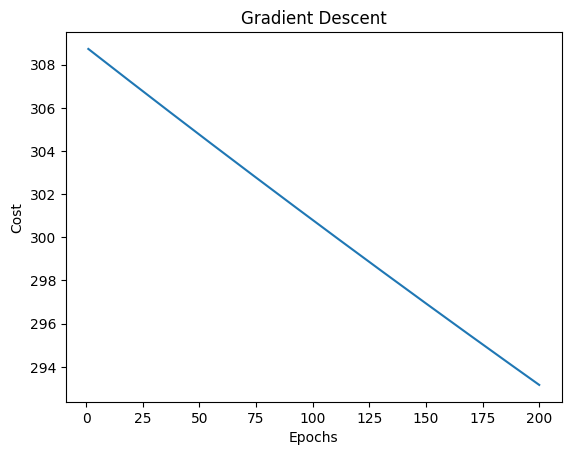

In [89]:
# Initalize the GD model
reg_GD = LinearRegressionGD(learning_rate=1e-4, iterations=200)

# Train model on normalized data
reg_GD.fit(X_train_norm_multi, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Iteration 0: Cost = 308.80403083687185
Iteration 100: Cost = 307.985955742791


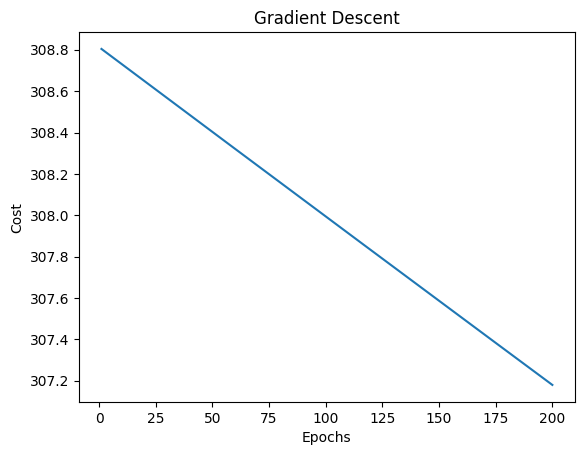

In [90]:
# Initalize the GD model
reg_GD = LinearRegressionGD(learning_rate=1e-5, iterations=200)

# Train model on normalized data
reg_GD.fit(X_train_norm_multi, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [94]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor(eta0 = 1e-4, max_iter=400, random_state=42, learning_rate='constant')

# Train model
reg_SGD.fit(X_train_norm_multi, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=400,
             random_state=42)

### Normal Equation (sklearn)

In [95]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm_multi, y_train)

LinearRegression()

### Algorithms Comparisons

In [96]:
w_GD = reg_GD.w
w_GD

array([-0.00761997,  0.0060242 , -0.00867694,  0.0051325 , -0.00660849,
        0.01604063, -0.00604077,  0.00387916, -0.00768961, -0.00864423,
       -0.01334265,  0.00729373, -0.01538121])

In [97]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([ 2.24940165e+01, -9.79870724e-01,  4.76449250e-01, -2.11652788e-02,
        8.56245792e-01, -1.25002463e+00,  3.03018408e+00, -3.86555328e-01,
       -2.39624028e+00,  1.00396342e+00, -4.03805628e-01, -1.88053017e+00,
        1.08567688e+00, -3.83098824e+00])

In [98]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [100]:
y_pred_GD = reg_GD.predict(X_test_norm_multi)

In [101]:
y_pred_SGD = reg_SGD.predict(X_test_norm_multi)

In [102]:
y_pred_NE = reg_NE.predict(X_test_norm_multi)

In [103]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 21.368703
MAE of SGD: 3.20281
MAE of NE: 3.16271


In [104]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 530.17748
MSE of SGD: 22.664379
MSE of NE: 21.517444


In [105]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -6.115226
R2 of SGD: 0.695834
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

R2 coefficient (Coefficient of Determination) or R-square formula is used to explain how much a dependent variable varies when the independent variable is varied. In other words, it explains the extent of variance of one variable concerning the other. The R-squared is the statistical measure in the stream of regression analysis. In regression, we generally deal with the dependent and independent variables. A change in the independent variable is likely to cause a change in the dependent variable.